# Assignment 2

### MACS 30150, Dr. Evans
### Dongcheng Yang  

### part 1 - ACME: Numerical Differentiation

problem1

In [1]:
from sympy import *
import sympy as sy
x = sy.symbols('x')
sy.diff((sin(x)+1)**(sin(cos(x))), x)

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

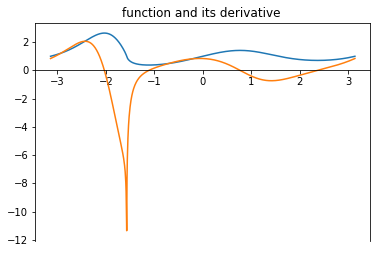

In [3]:
import numpy as np
import math

from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.set_title('function and its derivative ')

def f(x):
    return (np.sin(x)+1)**(np.sin(np.cos(x)))
def f_prime(x):
    return (-np.log(np.sin(x) + 1)*np.sin(x)*np.cos(np.cos(x)) \
            + np.sin(np.cos(x))*np.cos(x)/(np.sin(x) + 1))* \
            (np.sin(x) + 1)**np.sin(np.cos(x))
x = np.linspace(-math.pi,math.pi,1000)
plt.plot(x,f(x))
plt.plot(x, f_prime(x))
plt.show()

problem2

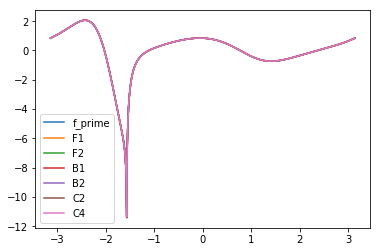

In [4]:
fig, ax = plt.subplots()
def F1(f, x, h):
    return (f(x+h)-f(x))/h
def F2(f, x, h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
def B1(f, x, h):
    return (f(x)-f(x-h))/h
def B2(f, x, h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)
def C2(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)
def C4(f, x, h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)
ax.plot(x,f_prime(x),label = "f_prime")
ax.plot(x,F1(f,x,0.0001),label = "F1")
ax.plot(x,F2(f,x,0.0001),label = "F2")
ax.plot(x,B1(f,x,0.0001),label = "B1")
ax.plot(x,B2(f,x,0.0001),label = "B2")
ax.plot(x,C2(f,x,0.0001),label = "C2")
ax.plot(x,C4(f,x,0.0001),label = "C4")
ax.legend()

In the plot above, we can see that when h is set as 0.0001, these altogether  
seven plots overlap with each other, which shows that when h is small, the   
six approximation all have good convergence properties.

problem3

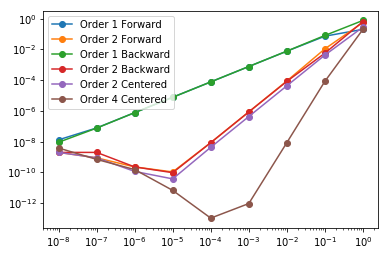

In [5]:
def absolute_error(func,x,h):
    return np.absolute(f_prime(x)-func(f,x,h))
x0=1
h = np.logspace(-8, 0, 9)
fig, ax = plt.subplots()
ax.loglog(h,absolute_error(F1,x0,h), marker='o',label = "Order 1 Forward")
ax.loglog(h,absolute_error(F2,x0,h), marker='o',label = "Order 2 Forward")
ax.loglog(h,absolute_error(B1,x0,h), marker='o',label = "Order 1 Backward")
ax.loglog(h,absolute_error(B2,x0,h), marker='o',label = "Order 2 Backward")
ax.loglog(h,absolute_error(C2,x0,h), marker='o',label = "Order 2 Centered")
ax.loglog(h,absolute_error(C4,x0,h), marker='o',label = "Order 4 Centered")
ax.legend(loc = "upper left")

problem4

In [6]:
input_data = np.load('plane.npy')
alpha = np.deg2rad(input_data[:,1])
beta = np.deg2rad(input_data[:,2])
a = 500
x = a*np.tan(beta)/(np.tan(beta)-np.tan(alpha))
y = a*np.tan(beta)*np.tan(alpha)/(np.tan(beta)-np.tan(alpha))
x_prime = np.zeros(8)
y_prime = np.zeros(8)
x_prime[0] = x[1]-x[0]
y_prime[0] = y[1]-y[0]
for i in range(1,7):
    x_prime[i] = (x[i+1]-x[i-1]) / 2
    y_prime[i] = (y[i+1]-y[i-1]) / 2
x_prime[7] = x[7]-x[6]
y_prime[7] = y[7]-y[6]
speed_value = np.sqrt(x_prime**2+y_prime**2)
for i,k in enumerate(speed_value):
    print("when t is {}, speed is {}".format(i+7,k))

when t is 7, speed is 46.424200622134585
when t is 8, speed is 47.00103938095283
when t is 9, speed is 48.998805140367324
when t is 10, speed is 50.09944162965303
when t is 11, speed is 48.290350838205164
when t is 12, speed is 51.56455904927243
when t is 13, speed is 53.923033545053535
when t is 14, speed is 51.51480056963612


problem5

In [7]:
def Jacobian(function,x0,h):
    jacob = np.zeros((len(function),len(x0)))
    variable_set = set()
    for func in function:
        variable_set = variable_set.union(func.atoms(Symbol))
    for i, func in enumerate(function):
        for j, v in enumerate(variable_set):
            func_prime = (func.subs(v, v + h) \
                          - func.subs(v, v - h)) \
                          / (2 * h)
            fx_prime = lambdify(v, func_prime)
            jacob[i,j] = fx_prime(x0[j])
    return jacob

x, y = symbols('x y')
func1=x**2
func2=x**3-y
func=[func1,func2]
x=[1,1]
h=1e-5
Jacobian(func,x,h)

array([[ 0.,  2.],
       [-1.,  3.]])

The result is the same as what I have calculated by scratch work.

problem7

In [8]:
from autograd import numpy as anp
from autograd import grad
import time

In [9]:
g=lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
dg=grad(g)

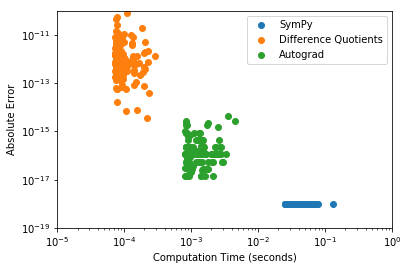

In [10]:
def experiment(N):
    global T1,T2,T3,abse1,abse2
    T1,T2,T3=[],[],[]
    error1,error2=[],[]
    for i in range(N):
        x0=np.random.uniform(-math.pi,math.pi)
        t0=time.clock()
        x = Symbol('x')
        y=(sin(x)+1)**(sin(cos(x)))
        sympy=lambda x: y.diff(x)
        f_prime=lambdify(x,sympy(x),'numpy')
        y0=f_prime(x0)
        t1=time.clock()
        T1.append(t1-t0)
        t2=time.clock()
        y1=C4(f,x0,0.0001)
        t3=time.clock()
        T2.append(t3-t2)
        error1.append(abs(y1-y0))
        t4=time.clock()
        y2=dg(x0)
        t5=time.clock()
        T3.append(t5-t4)
        error2.append(abs(y2-y0))
    plt.scatter(np.array(T1),np.array([1e-18] * N),label="SymPy")
    plt.scatter(np.array(T2),np.array(error1),label="Difference Quotients")
    plt.scatter(np.array(T3),np.array(error2),label="Autograd")
    plt.legend(loc='upper right')
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    plt.xlim(10**-5,1)
    plt.ylim(10**-19,10**-10)
    plt.loglog()
experiment(200)